In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [4]:
training_set = train_datagen.flow_from_directory('C:/Users/Admin/Desktop/school works/beans/data/train',
                                                target_size= (64,64),
                                                batch_size = 32,
                                                class_mode = 'categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:/Users/Admin/Desktop/school works/beans/data/test',
                                            target_size= (64,64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 20348 images belonging to 4 classes.
Found 10180 images belonging to 4 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2, input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(Dense(4,activation='softmax'))

cnn.compile(optimizer ='adam', loss='squared_hinge', metrics =['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,050,116
Trainable params: 1,050,116
Non-trainable params: 0
______________________________________________

In [8]:
cnn.compile(optimizer ='adam',  loss='squared_hinge', metrics =['accuracy'])
r=cnn.fit(x = training_set,validation_data = test_set, epochs = 15)

Epoch 1/15
636/636 [==============================] - 954s 1s/step - loss: 1.0103 - accuracy: 0.7402 - val_loss: 1.0440 - val_accuracy: 0.6797
Epoch 2/15
636/636 [==============================] - 915s 1s/step - loss: 0.8820 - accuracy: 0.8714 - val_loss: 1.0100 - val_accuracy: 0.7270
Epoch 3/15
636/636 [==============================] - 937s 1s/step - loss: 0.8514 - accuracy: 0.9011 - val_loss: 1.0220 - val_accuracy: 0.7139
Epoch 4/15
636/636 [==============================] - 870s 1s/step - loss: 0.8286 - accuracy: 0.9248 - val_loss: 1.0505 - val_accuracy: 0.6880
Epoch 5/15
636/636 [==============================] - 829s 1s/step - loss: 0.8081 - accuracy: 0.9473 - val_loss: 1.0421 - val_accuracy: 0.6923
Epoch 6/15
636/636 [==============================] - 813s 1s/step - loss: 0.8029 - accuracy: 0.9500 - val_loss: 1.0618 - val_accuracy: 0.6792
Epoch 7/15
636/636 [==============================] - 948s 1s/step - loss: 0.7941 - accuracy: 0.9593 - val_loss: 1.0658 - val_accuracy: 0.6706

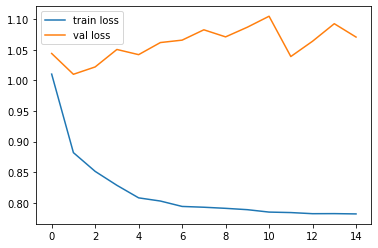

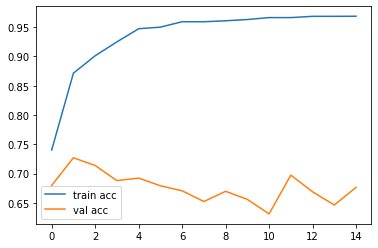

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [10]:
from tensorflow.keras.models import load_model

cnn.save('model_cnn_beans.h5')

In [12]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_cnn_beans.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1048704   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 1,050,116
Trainable params: 1,050,116
Non-trainable params: 0
______________________________________________